<a href="https://colab.research.google.com/github/Mehrdad-Chamani/Artificial-Neural-Networks/blob/main/ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-Layer NN For MNIST Handwritten Digits Classification

Initialization      ( آغاز گر ) مشخصات آغازين

Query   محاسبه خروجي شبکه ( پرس و جو گر - پيشخور )   

Train   اصلاح وزن ها ( يادگيري - پس انتشار)   

# Neural Network Class Definition

In [ ]:
import numpy as np
from scipy.special import expit, logit   # sigmoid
import matplotlib.pyplot as plt


class NeuralNetwork:
  
  # initialize the neural network
  # معماري شبکه , راه اندازي شبکه عصبي
  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):   # ورودي ها    
    # set number of input, hidden and output layers
    # number of nodes in each layer
    # تعیین تعداد نورون های لایه های مختلف
    self.input_nodes = input_nodes   # متغيرند   
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes
    

    # set the learning rate
    # تعیین نرخ یادگیری 
    self.learning_rate = learning_rate

    # ایجاد تابع فعال سازی که اینجا زیگموئیدی است ولی می تواند متفاوت باشد   
    self.activation_function = lambda x : expit(x)
    # ايجاد معکوس تابع فعال سازي براي توليد ورودي هر نورون از روي خروجي 
    # ( ايجاد معکوس تابع فعال سازي براي اجراي پيش خور معکوس )
    self.inverse_activation_function = lambda x : logit(x)

    # ایجاد دو ماتریس وزن های اولیه 
    # یکی برای وزن های بین لایه ورودی و مخفی ، یکی برای وزن های بین لایه مخفی و خروجی
    # هر وزن با ایندکس آی و جی ، وزن اتصال بین نورون آی از لایه مبدا ، به نورون جی در لایه مقصد است
    # و به همین ترتیب w12 w21 مثلا    
    # link weight matrices, w_input_hidden and w_hidden_output 
    # weights inside the arrays are w_i_j, where link is from node
    # i to node j in the next layer 
    # w11 w21
    # w12 w22 etc
    
    # [-0.5, 0.5]
    # self.w_i_h = np.random.rand(self.hidden_nodes, self.input_nodes) - 0.5
    mu = 0   # mean and standard deviation
    self.w_i_h = np.random.default_rng().normal(mu, pow(self.input_nodes, -0.5),
                                                (self.hidden_nodes, self.input_nodes))
    # [-0.5, 0.5]
    # self.w_h_o = np.random.rand(self.output_nodes, self.hidden_nodes) - 0.5
    self.w_h_o = np.random.default_rng().normal(mu, pow(self.hidden_nodes, -0.5),
                                                (self.output_nodes, self.hidden_nodes))
    pass

  # train the neural network
  # يادگيري شبکه بر اساس يک نمونه ورودي/خروجي - پس انتشار
  def train(self, input_list, targets_list):
    # محاسبه سيگنال هاي ورودي و خروجي لايه ها 
    inputs = np.array(input_list, ndmin=2).T
    
    x_hidden = np.dot(self.w_i_h, inputs)
    o_hidden = self.activation_function(x_hidden)

    x_output = np.dot(self.w_h_o, o_hidden)
    o_output = self.activation_function(x_output)

    # محاسبه خطاي شبکه بر اساس اختلاف خروجي با هدف ها
    targets = np.array(targets_list, ndmin=2).T
    output_errors = targets - o_output
    # پس انتشار خطاي شبکه روي نورون هاي لايه مخفي
    hidden_errors = np.dot(self.w_h_o.T, output_errors)

    # محاسبه وزن هاي جديد اتصال ها با گراديان کاهشي
    # self.w_h_o_new - self.w_h_o = ()
    # self.w_h_o += self.learning_rate * np.dot((Ek * Ok * 1 - Ok ), Oj.T)
    self.w_h_o += self.learning_rate * np.dot((output_errors * o_output * (1 - o_output)), o_hidden.T)
    self.w_i_h += self.learning_rate * np.dot((hidden_errors * o_hidden * (1 - o_hidden)), inputs.T)

  
  # query the neural network
  # محاسبه خروجي شبکه با دادن ورودي - پيش خور  
  def query(self, input_list):
    # input ---> list
    # تبديل ليست مقادير ورودي به آرايه دو بعدي 
    # [1, 2, 3] ---> array
    inputs = np.array(input_list, ndmin=2).T

    # محاسبه سيگنال ورودي و سپس خروجي لايه مخفي 
    # X(hidden) = W(i_h) * I
    x_hidden = np.dot(self.w_i_h, inputs)
    # O = Sigmoid(X)
    o_hidden = self.activation_function(x_hidden)

    # محاسبه سيگنال ورودي و سپس خروجي لايه خروجي 
    # X(output) = W(h_o) * O(h)
    x_output = np.dot(self.w_h_o, o_hidden)
    # O = Sigmoid(X)
    o_output = self.activation_function(x_output)

    return o_output


  def reversequery(self, targets_list):
    o_output = np.array(targets_list, ndmin= 2).T
    # رسیدن از خروجی لایه آخر به خروجی لایه مخفی
    x_output = self.inverse_activation_function(o_output)
    o_hidden = np.dot(self.w_h_o.T, x_output)
    # مقیاس کردن داده‌ها برای تزریق به تابع معکوس فعال‌سازی (لاگیت) لایه مخفی
    o_hidden -= np.min(o_hidden)
    o_hidden /= np.max(o_hidden)
    o_hidden *= 0.98
    o_hidden += 0.01

    # رسیدن از خروجی لایه مخفی به ورودی شبکه
    x_hidden = self.inverse_activation_function(o_hidden)
    inputs = np.dot(self.w_i_h.T, x_hidden)
    # شبکه با ورودی‌های مقیاس شده تعلیم دیده پس ورودی‌های تولیدی باید مقیاس شوند
    inputs -= np.min(inputs)
    inputs /= np.max(inputs)
    inputs *= 0.98
    inputs += 0.01

    return inputs


In [ ]:
# sample :

# استاندارد سازي ، نرمال سازي ( min, max )
# 1
# 2, 5, 9
# ---> ( 0, 3/7, 1 ) * 0.99

# 2
# 2, 5, 9
# ---> 0, 3, 7
# ---> 0, 3/7, 1

### مراحل اجراي کار : 
### تهيه داده 
### مناسب سازي 
### آموزش و آزمايش 
### پيش بيني 
### بهبود شبکه 
### اسکن مغز 

# Neural Network Instance Creation

In [ ]:
# اتصال درايو به کولب و خواندن ديتاست امنيست
# فراخواني داده هاي آموزش از ديتاست امنيست
from google.colab import drive
drive.mount('/content/drive')
train_file = open('/content/drive/MyDrive/mnist/mnist_train.csv', 'r')
train_list = train_file.readlines()
train_file.close()

# فراخواني داده هاي آزمايش از ديتاست امنيست
# open('', 'r')
test_file = open('/content/drive/MyDrive/mnist/mnist_test.csv', 'r')
test_list = test_file.readlines()
test_file.close()

Mounted at /content/drive


In [ ]:
# تعيين تعداد نورون ها در هر لايه 
input_nodes = 784
hidden_nodes = 200   # input_nodes > hidden_nodes > output_nodes
output_nodes = 10

# تعيين نرخ يادگيري شبکه 
learning_rate = 0.1

# تعيين تعداد دوره يادگيري : تکرار يادگيري با تمام ديتاست را يک دوره گوييم 
epochs = 4
# epoch ---> دوره 
# iteration ---> تکرار 

# ساخت نمونه از شبکه عصبي با معماري بالا 
nn = NeuralNetwork(input_nodes= input_nodes, 
                   hidden_nodes= hidden_nodes, 
                   output_nodes= output_nodes, 
                   learning_rate= learning_rate)
# print("initial weights ( W_input_hidden ): ", nn.w_i_h)


# NN Training and Testing with MNIST

In [ ]:
# آماده سازي داده ها :
# تغيير مقياس داده هاي ورودي 
# تغيير مقياس داده هاي خروجي

In [ ]:
# sample :

# مقياس کردن داده هاي ورودي به محدوده 0.01 تا 1

# 0 - 255
# 0   ---> 0/255   = 0
# 255 ---> 255/255 = 1

# 0    ---> 0/255   * 0.99 = 0
# 255  ---> 255/255 * 0.99 = 0.99

# 0    ---> 0/255   * 0.99 = 0    + 0.01 = 0.01
# 255  ---> 255/255 * 0.99 = 0.99 + 0.01 = 1

In [ ]:
# مثال خروجي به ازاي عدد 5 :
# [0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01]

In [ ]:
# مقياس کردن داده هاي خروجي به محدوده 0.01 تا 0.99 و ده کلاس

In [ ]:
# آموزش شبکه ساخته شده با داده هاي آموزشي امنيست 
# Batch gradient descent
# مقياس کردن داده هاي ورودي به محدوده 0.01 تا 1
# مقياس کردن داده هاي خروجي به محدوده 0.01 تا 0.99 و ده کلاس
for e in range (epochs):
  for row in train_list:   # iteration ---> 60000
    row_data = row.split(',')
    inputs = (np.asfarray(row_data[1:]) / (255.0 * 0.98)) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(row_data[0])] = 0.99
    nn.train(inputs, targets)

# print("weights ( W_input_hidden ) after a round of training : ", nn.w_i_h)

Target test is :  7


array([[0.01501217],
       [0.00634167],
       [0.0153491 ],
       [0.00996723],
       [0.01229685],
       [0.00785761],
       [0.00599982],
       [0.99312235],
       [0.00459644],
       [0.00765704]])

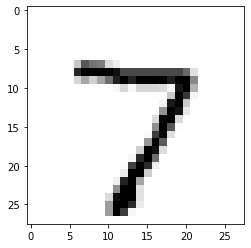

In [ ]:
# آزمايش شبکه ساخته شده با يکي از داده هاي مجموعه آزمايشي 
# test_list
# نمايش عکس ها در ديتاست امنيست
# انتخاب يکي از داده ها و نمايش نام و تصوير آن 
test_row_data = test_list[0].split(',')
# print(test_row_data)   # python list != numpy array
# print(test_row_data[0])
print("Target test is : ", test_row_data[0])

image_data = np.asfarray(test_row_data[1:]).reshape((28,28))
# image_data ---> array
image = plt.imshow(image_data, cmap='Greys')

# بررسي پيش بيني شبکه از داده انتخاب شده 
nn.query((np.asfarray(test_row_data[1:]) / (255.0 * 0.98)) + 0.01)

In [ ]:
# آزمايش عملکرد شبکه به لحاظ پيش بيني همه داده هاي آزمايشي 
score_card = []
for row in test_list:
  row_data = row.split(',')
  target_number = int(row_data[0])
  inputs = (np.asfarray(row_data[1:]) / 255.0 * 0.98) + 0.01
  outputs = nn.query(inputs)
  predicted_number = np.argmax(outputs)
  # print("\nTarget Number : ", target_number)
  # print("Predicted Number : ", predicted_number)
  if (target_number == predicted_number):
    score_card.append(1)
  else:
    score_card.append(0)

# گزارش عملکرد شبکه 
# print("\n\nTotal Score Card :", score_card)
# print("\n\nNet Score Card :", score_card)
score_card_array = np.asarray(score_card)
print("\nNet Performance : ", score_card_array.sum() / score_card_array.size) 


Net Performance :  0.9722


In [ ]:
print(len(score_card))

10000


In [ ]:
print(len(train_list))

60000


Text(0.5, 1.0, '3-Layer NN For MNIST Handwritten Digits Classification')

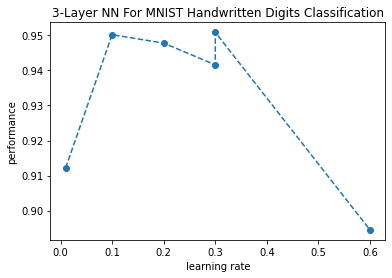

In [ ]:
# بهينه يابي نرخ يادگيري 
tested_learning_rate = [0.01, 0.1, 0.2, 0.3, 0.3, 0.6]
performance_list = [0.9122, 0.9502, 0.9478, 0.9416, 0.9509, 0.8945]
fig, ax = plt.subplots()
ax.plot(tested_learning_rate, performance_list,
        linestyle='--', marker='o');
ax.set_xlabel('learning rate')
ax.set_ylabel('performance')
ax.set_title("3-Layer NN For MNIST Handwritten Digits Classification")
# نرخ يادگيري 0.1 انتخاب شد 

Text(0.5, 1.0, '3-Layer NN For MNIST Handwritten Digits Classification')

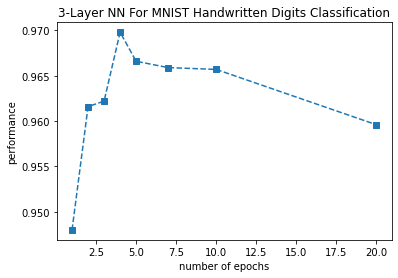

In [ ]:
# بهينه يابي تعداد دوره يادگيري 
epoch_list = [1, 2, 3, 4, 5, 7, 10, 20]
performance_list = [0.948, 0.9616, 0.9622, 0.9698, 0.9666, 0.9659, 0.9657, 0.9596]
fig, ax = plt.subplots()
ax.plot(epoch_list, performance_list,
        linestyle='--', marker='s');
ax.set_xlabel('number of epochs')
ax.set_ylabel('performance')
ax.set_title("3-Layer NN For MNIST Handwritten Digits Classification")
# تعداد دوره 4 انتخاب شد . البته ميتوان با نرخ يادگيري کمتر مثل 0.07 هم تعداد دوره ها را بررسي کرد 
# هرچه تعداد دوره ها بيشتر شود ، نرخ يادگيري بايستي کمي کمتر انتخاب شود ( مثلا 0.05 ) 

Text(0.5, 1.0, '3-Layer NN For MNIST Handwritten Digits Classification')

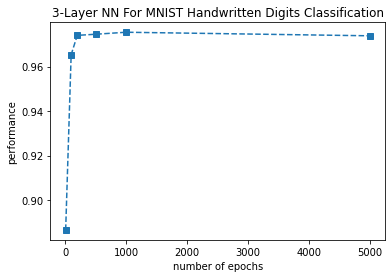

In [ ]:
# بهينه يابي تعداد نورون هاي لايه مخفي 
h_nodes_list = [10, 100, 200, 500, 1000, 5000]
performance_list = [0.8866, 0.9653, 0.974, 0.9745, 0.9754, 0.9738]
fig, ax = plt.subplots()
ax.plot(h_nodes_list, performance_list,
        linestyle='--', marker='s');
ax.set_xlabel('number of epochs')
ax.set_ylabel('performance')
ax.set_title("3-Layer NN For MNIST Handwritten Digits Classification")
# تعداد نورون هاي لايه مخفي با توجه به در نظر گرفتن تعادل حرکت و سرعت اجرا ، 200 انتخاب شد 

# Predicting Our Own Images Using the NN

In [ ]:
# فراخواني عکس هاي خودمان و مناسب سازي داده هاي درون آنها 

import imageio
import glob

our_own_dataset = []

# فراخواني تصاوير خودمان به عنوان مجموعه داده تست 
my_images_path = '/content/drive/MyDrive/my_digit_images/2828_my_own_?.png'
for image_file_name in glob.glob(my_images_path):

  # نام فايل همان ليبل يا هدف مورد پيش بيني است 
  label = int(image_file_name[-5:-4])
  print("loading . . . ", image_file_name)

  # واريز داده هاي پيکسل هاي عکس پي.ان.جي در يک آرايه 
  img_array = imageio.imread(image_file_name, as_gray= True)
  # ايجاد يک آرايه خطي 784 عضوي از ماتريس 28 در 28 عکس بالا و معکوس کردن مقادير 
  # ( مطابق با داده هاي امنيست : صفر نشانه سفيد و 255 سياه است )
  img_data = 255.0 - img_array.reshape(784)

  # آماده کردن ورودي 
  img_data = (img_data / 255.0 * 0.99) + 0.01
  print(np.min(img_data))
  print(np.max(img_data))

  # ايجاد ديتاست شبيه به ديتاست امنيست - شامل سطرهايي که 
  # هر سطر داده هاي يک عکس شامل 785 عدد باشد . 1 خروجي بعلاوه 784 عدد سازنده ورودي ها 
  record = np.append(label, img_data)
  our_own_dataset.append(record)

loading . . .  /content/drive/MyDrive/my_digit_images/2828_my_own_2.png
0.01
1.0
loading . . .  /content/drive/MyDrive/my_digit_images/2828_my_own_3.png
0.01
1.0
loading . . .  /content/drive/MyDrive/my_digit_images/2828_my_own_4.png
0.01
0.93011767
loading . . .  /content/drive/MyDrive/my_digit_images/2828_my_own_5.png
0.01
0.86800003
loading . . .  /content/drive/MyDrive/my_digit_images/2828_my_own_6.png
0.01
1.0


In [ ]:
# sample :

a = 'mehrdad_12.png'
print(int(a[-6:-4]))

12


[[0.00602914]
 [0.05251026]
 [0.00080971]
 [0.00478259]
 [0.00856144]
 [0.12154868]
 [0.44303162]
 [0.01472137]
 [0.0036339 ]
 [0.00777473]]
پيش بيني شبکه :  6
پيش بيني درست است !


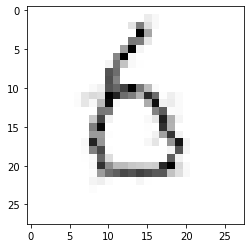

In [ ]:
# پيش بيني شبکه عصبي از عدد نوشته شده در يک عکس تصادفي 

# انتخاب يک عکس به صورت تصادفي
item = 4

# نمايش عکس انتخاب شده 
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap= 'Greys', interpolation= 'None')

# نخستين عضو سطر انتخاب شده همان خروجي ( عدد درون عکس ) است 
correct_label = our_own_dataset[item][0]
# باقي داده هاي آن سطر ، ورودي ها هستند . 
inputs = our_own_dataset[item][1:]

# پرس و جوي شبکه در مورد اين عکس 
outputs = nn.query(inputs)
print(outputs)

# ايندکس بزرگترين عدد در رشته خروجي توليدي شبکه نشانه پيش بيني شبکه است 
label = np.argmax(outputs)
print('پيش بيني شبکه : ', label)
if (label == correct_label):
  print('پيش بيني درست است !')
else:
  print('پيش بيني نادرست است !')

[[4.43861649e-03]
 [1.94810009e-03]
 [6.86702008e-03]
 [9.93354104e-03]
 [4.21878727e-04]
 [8.31414639e-01]
 [8.37546662e-03]
 [1.67074164e-02]
 [7.91530709e-05]
 [6.39216346e-03]]
پيش بيني شبکه :  5
پيش بيني درست است !


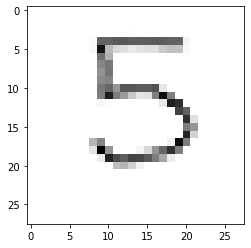

In [ ]:
# پيش بيني شبکه عصبي از عدد نوشته شده در يک عکس تصادفي 

# انتخاب يک عکس به صورت تصادفي
item = 3

# نمايش عکس انتخاب شده 
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap= 'Greys', interpolation= 'None')

# نخستين عضو سطر انتخاب شده همان خروجي ( عدد درون عکس ) است 
correct_label = our_own_dataset[item][0]
# باقي داده هاي آن سطر ، ورودي ها هستند . 
inputs = our_own_dataset[item][1:]

# پرس و جوي شبکه در مورد اين عکس 
outputs = nn.query(inputs)
print(outputs)

# ايندکس بزرگترين عدد در رشته خروجي توليدي شبکه نشانه پيش بيني شبکه است 
label = np.argmax(outputs)
print('پيش بيني شبکه : ', label)
if (label == correct_label):
  print('پيش بيني درست است !')
else:
  print('پيش بيني نادرست است !')

# Black Box of the NN ( Brain Scan )

اسکن مغز شبکه عصبي براي عدد :  0


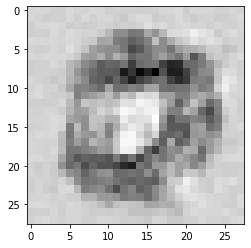

In [ ]:
# شبکه به چه عددی فکر کند؟
label = 0
# تبدیل عدد درخواستی به لیستی با مقادیر مقیاس‌شده
targets_list = np.zeros(output_nodes) + 0.01
targets_list[label] = 0.99
# تولید عکس عدد با  تابع پرس و جوی معکوس شبکه
image_array = nn.reversequery(targets_list)
print('اسکن مغز شبکه عصبي براي عدد : ', label)
plt.imshow(image_array.reshape((28, 28)), cmap= 'Greys')

اسکن مغز شبکه عصبي براي عدد :  6


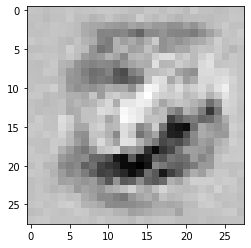

In [ ]:
label = 6
targets_list = np.zeros(output_nodes) + 0.01
targets_list[label] = 0.99
image_array = nn.reversequery(targets_list)
print('اسکن مغز شبکه عصبي براي عدد : ', label)
plt.imshow(image_array.reshape((28, 28)), cmap= 'Greys')